In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


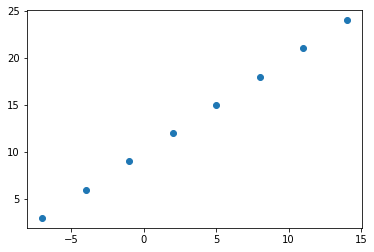

In [2]:
X = np.array([-7,-4,-1,2,5,8,11,14])
y = np.array([3,6,9,12,15,18,21,24])

plt.scatter(X,y)

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

In [4]:
X = tf.range(0,200,4).numpy()

# Create labels (using tensors)
y = X +  10


X,y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [5]:
tf.random.set_seed(42)

In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.Dense(100, activation = 'relu'),

          tf.keras.layers.Dense(100, activation = 'relu'),

      tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss= 'mae', # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr = 0.005), # SGD is short for stochastic gradient descent
              metrics=["mse"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

C:\Users\emiel\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
2/2 [==============================] - 4s 19ms/step - loss: 106.1126 - mse: 14426.2783
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 60.4048 - mse: 4552.3682
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 6.3890 - mse: 157.4604
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 34.5924 - mse: 1717.1638
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 9.5535 - mse: 132.0995
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 14.3187 - mse: 212.3582

In [7]:
y_pred = model.predict(X_test)

In [8]:
model.evaluate(y_pred,y_test)

1/1 [==============================] - 1s 856ms/step - loss: 2.5192 - mse: 9.8309


[2.51918888092041, 9.830904006958008]

In [9]:
model.predict([8])

array([[12.598083]], dtype=float32)